<br>
<center style="color:#180090; font-weight: bold; font-size: 3em">Esercitazione 2</center><br>
<center style="color:#555555; font-size: 2em; margin-bottom: 0.2cm;">Francesco Righini</center>
<center style="color:#555555; font-size: 1.5em">(931984)</center>

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Calcolare l'integrale unidimensionale
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
con un metodo di integrazione Monte Carlo.<br>
Mostrare l'andamento della stima dell'integrale con relativa incertezza in funzione del numero di blocchi utilizzati.
</div>    

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Campionando l'intervallo $[0,1]$ con una distribuzione uniforme.

<div style="font-size: 0.43cm;">
Si sono utilizzati in totale $10^5$ punti distribuiti uniformemente nell'intervallo $[0,1]$ e le medie sono state raggruppate in $200$ blocchi, da $500$ punti ognuno.<br>
</div>

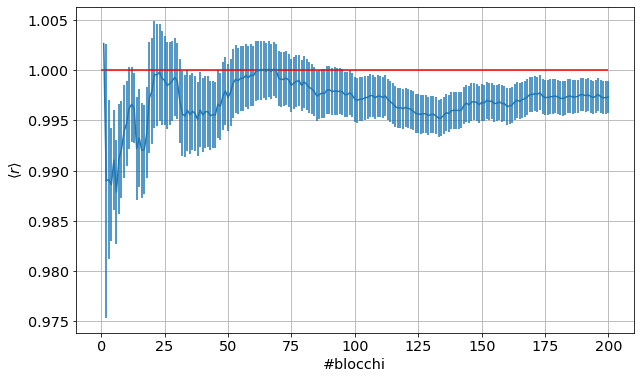

In [2]:
media, sigma = np.loadtxt("results/1_1.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(media))+1
plt.errorbar(x,media,yerr=sigma)
plt.hlines(1,0,len(media),color="red")
plt.xlabel('#blocchi')
plt.ylabel(r'$\langle r \rangle$')
plt.grid(True)
plt.show()

<div style="font-size: 0.43cm;">
Considerando tutti i blocchi si è ottenuta la stima $0.9973 \pm 0.0016$, distante $1.7\sigma$ dal valore esatto $1$.
</div>

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 2</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Utilizzando un metodo di importance sampling.

<div style="font-size: 0.43cm;">
Per utilizzare metodi di importance sampling serve trovare una funzione che approssimi al meglio l'integranda. Questa funzione $g(x)$ deve essere abbastanza semplice, affinché possa essere trovata la cumulativa $G(x)$ (normalizzata) e possa essere invertita, ottenendo $G^{-1}(y)$ con $y\in[0,1]$.<br>
Il primo tentativo svolto è stato quello di approssimare l'integranda con la parabola<br><br>
$$g_1(x) = -\frac{\pi}{2}x^2 + \frac{\pi}{2}$$
la cui cumulativa è facile da trovare e normalizzare, ma non è invertibile analiticamente.
Il secondo tentativo ha voluto approssimare l'integranda con la retta<br><br>
$$g_2(x) = -\frac{\pi}{2}x + \frac{\pi}{2}$$  
la cui cumulativa è facile da trovare, normalizzare e invertire:<br><br>
$$G_2^{-1}(y) = 1-\sqrt{1-y}.$$
</div>

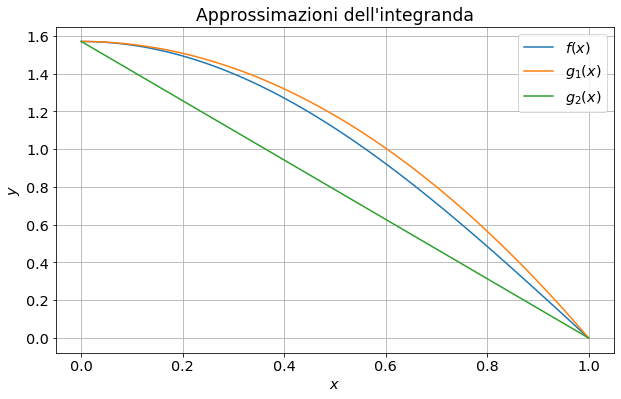

In [3]:
x = np.linspace(0,1,101)
plt.plot(x,np.pi/2 * np.cos(np.pi/2 * x), label=r'$f(x)$')
plt.plot(x,np.pi/2 *(-x**2+1), label=r'$g_1(x)$')
plt.plot(x,np.pi/2 *(-x+1), label=r'$g_2(x)$')
plt.title("Approssimazioni dell'integranda")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.legend()
plt.show()

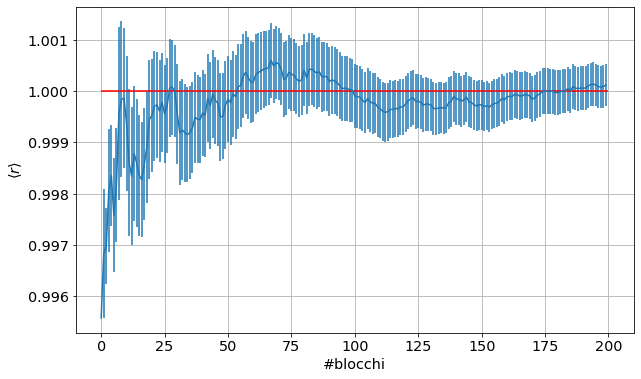

In [4]:
media, sigma = np.loadtxt("results/1_2.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(media))
plt.errorbar(x,media,yerr=sigma)
plt.hlines(1,0,len(media),color="red")
plt.xlabel('#blocchi')
plt.ylabel(r'$\langle r \rangle$')
plt.grid(True)
plt.show()

<div style="font-size: 0.43cm;">
Considerando tutti i blocchi si è ottenuta la stima $1.0001 \pm 0.0004$, più precisa della stima precedente e altamente compatibile col valore esatto $1$.
</div>

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 2</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Simulare dei random walks tridimensionali uscenti dall'origine del sistema di riferimento.<br>
Mostrare l'andamento di $\sqrt{\langle |\vec{r}_i|^2 \rangle_{RW}}$ con relativa incertezza in funzione del numero di passi $i$.
</div>    

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Si utilizzi come spazio per il random walk una griglia cubica di passo $a=1$. Ad ogni timestep corrisponde un solo movimento di lunghezza unitaria in una delle tre direzioni della griglia (tre direzioni corrispondono a sei versi in tutto).<br>
Si eseguano $10^4$ simulazioni di random walks di lunghezza $100$.
</div>    

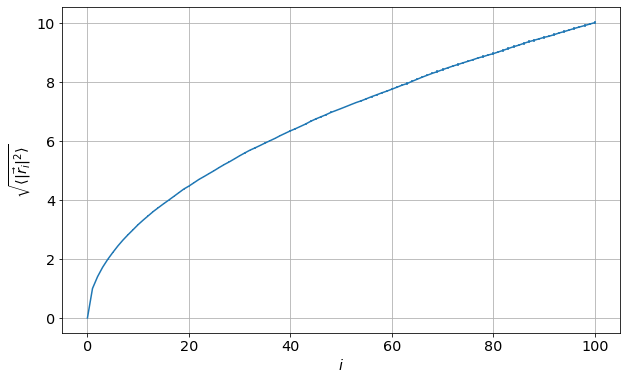

In [5]:
media, sigma = np.loadtxt("results/2_1.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(media))
griglia = media
plt.errorbar(x,media,yerr=sigma)
plt.xlabel(r'$i$')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_i|^2 \rangle}$')
plt.grid(True)
plt.show()

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 2</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Si faccia evolvere il random walk nello spazio continuo tridimensionale. Ad ogni timestep corrisponde un movimento di lunghezza unitaria in una qualsiasi direzione spaziale tridimensionale.<br>
Si eseguano $10^4$ simulazioni di random walks di lunghezza $100$.
</div>    

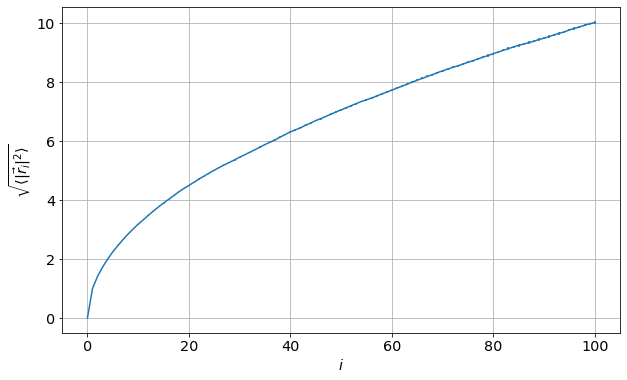

In [6]:
media, sigma = np.loadtxt("results/2_2.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(media))
spazio = media
plt.errorbar(x,media,yerr=sigma)
plt.xlabel(r'$i$')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_i|^2 \rangle}$')
plt.grid(True)
plt.show()

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Notare che si possono interpolare entrambi i risultati con una funzione del tipo $f(i)=k\sqrt{i}$. I risultati indicano un comportamento diffusivo?
</div>

<div style="font-size: 0.43cm;">
I risultati seguono un comportamento diffusivo in quanto la varianza della distanza raggiunta cresce linearmente col tempo, ossia $\sigma=\sqrt{\langle |\vec{r}_i|^2 \rangle}$ va come $\sqrt{i}$.
</div>

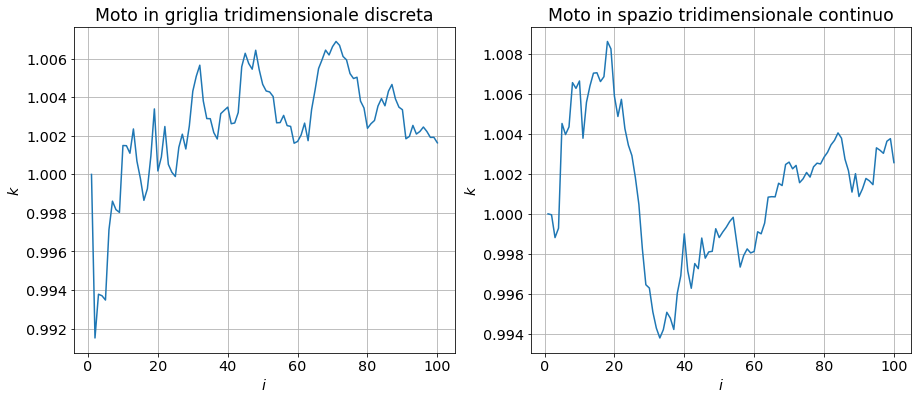

In [7]:
fig, axs = plt.subplots(1,2,figsize=(15,6))

axs = axs.flat

axs[0].plot(x[1:],griglia[1:]/np.sqrt(x[1:]))
axs[0].set(xlabel=r'$i$', ylabel=r'$k$', title = r'Moto in griglia tridimensionale discreta')
axs[0].grid(True)

axs[1].plot(x[1:],spazio[1:]/np.sqrt(x[1:]))
axs[1].set(xlabel=r'$i$', ylabel=r'$k$', title = r'Moto in spazio tridimensionale continuo')
axs[1].grid(True)